In [2]:
import pandas as pd

df = pd.read_csv('data/Expresso_churn_dataset.csv')
print(df.head())
print(df.info())

                                    user_id  REGION         TENURE  MONTANT  \
0  00000bfd7d50f01092811bc0c8d7b0d6fe7c3596  FATICK   K > 24 month   4250.0   
1  00000cb4a5d760de88fecb38e2f71b7bec52e834     NaN  I 18-21 month      NaN   
2  00001654a9d9f96303d9969d0a4a851714a4bb57     NaN   K > 24 month   3600.0   
3  00001dd6fa45f7ba044bd5d84937be464ce78ac2   DAKAR   K > 24 month  13500.0   
4  000028d9e13a595abe061f9b58f3d76ab907850f   DAKAR   K > 24 month   1000.0   

   FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET  \
0            15.0   4251.0        1417.0       17.0          4.0   388.0   
1             NaN      NaN           NaN        NaN          NaN     NaN   
2             2.0   1020.0         340.0        2.0          NaN    90.0   
3            15.0  13502.0        4501.0       18.0      43804.0    41.0   
4             1.0    985.0         328.0        1.0          NaN    39.0   

   ORANGE  TIGO  ZONE1  ZONE2 MRG  REGULARITY                       

In [3]:
# 1. Distribution de la cible
print(df['CHURN'].value_counts(normalize=True))

# 2. Pourcentage de valeurs manquantes par colonne
missing = df.isnull().mean().sort_values(ascending=False) * 100
print(missing)

# 3. Aperçu de quelques colonnes clés
print(df['TENURE'].value_counts())
print(df['REGION'].value_counts())

CHURN
0    0.812453
1    0.187547
Name: proportion, dtype: float64
ZONE2             93.648052
ZONE1             92.120835
TIGO              59.887988
DATA_VOLUME       49.229776
TOP_PACK          41.902223
FREQ_TOP_PACK     41.902223
ORANGE            41.561191
REGION            39.428044
ON_NET            36.520774
MONTANT           35.131018
FREQUENCE_RECH    35.131018
FREQUENCE         33.706213
ARPU_SEGMENT      33.706213
REVENUE           33.706213
user_id            0.000000
TENURE             0.000000
MRG                0.000000
REGULARITY         0.000000
CHURN              0.000000
dtype: float64
TENURE
K > 24 month     2043201
I 18-21 month      45278
H 15-18 month      26006
G 12-15 month      14901
J 21-24 month      12725
F 9-12 month        9328
E 6-9 month         1839
D 3-6 month          770
Name: count, dtype: int64
REGION
DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA   

=== Statistiques descriptives ===
            MONTANT  FREQUENCE_RECH       REVENUE  ARPU_SEGMENT     FREQUENCE  \
count  1.397309e+06    1.397309e+06  1.428000e+06  1.428000e+06  1.428000e+06   
mean   5.532117e+03    1.152912e+01  5.510810e+03  1.836943e+03  1.397814e+01   
std    7.111339e+03    1.327407e+01  7.187113e+03  2.395700e+03  1.469403e+01   
min    1.000000e+01    1.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
25%    1.000000e+03    2.000000e+00  1.000000e+03  3.330000e+02  3.000000e+00   
50%    3.000000e+03    7.000000e+00  3.000000e+03  1.000000e+03  9.000000e+00   
75%    7.350000e+03    1.600000e+01  7.368000e+03  2.456000e+03  2.000000e+01   
max    4.700000e+05    1.330000e+02  5.321770e+05  1.773920e+05  9.100000e+01   

        DATA_VOLUME        ON_NET        ORANGE           TIGO          ZONE1  \
count  1.093615e+06  1.367373e+06  1.258800e+06  864032.000000  169721.000000   
mean   3.366450e+03  2.776891e+02  9.541871e+01      23.109253       8.170

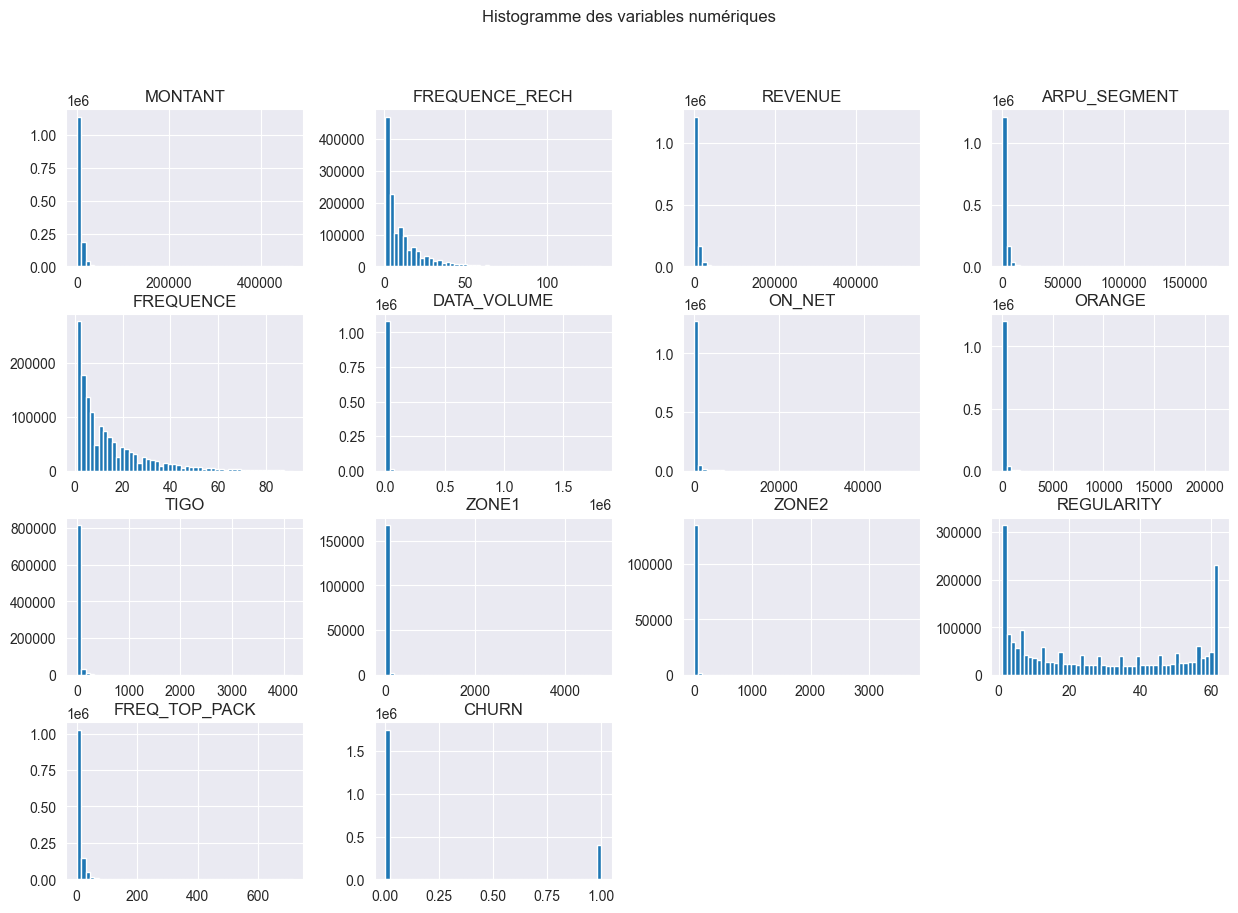

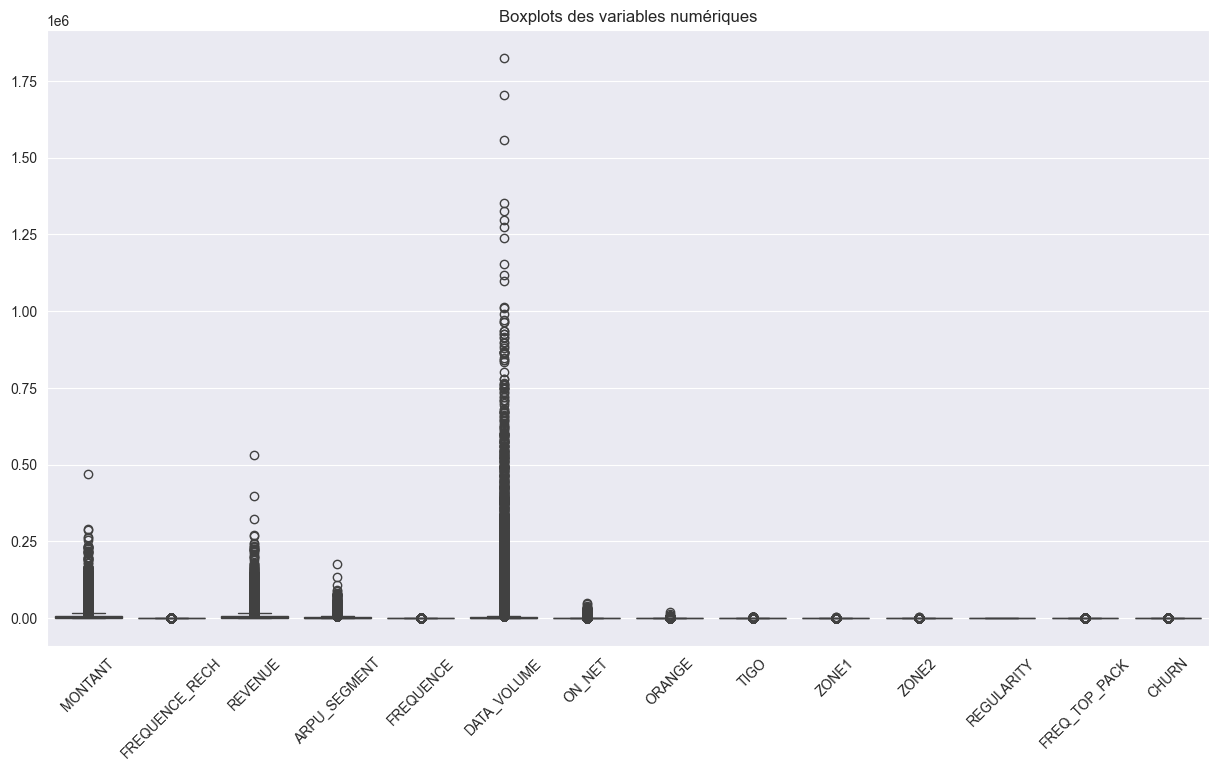

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Stats descriptives
print("=== Statistiques descriptives ===")
print(df.describe())

# 2. Histogrammes (distributions)
df.hist(figsize=(15, 10), bins=50)
plt.suptitle("Histogramme des variables numériques")
plt.show()

# 3. Boxplots (outliers)
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=45)
plt.title("Boxplots des variables numériques")
plt.show()

In [5]:
# Nettoyage des valeurs manquantes

# Médiane pour valeurs numériques
# num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# 'Unknown' pour les variables catégorielles
# cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')

# Suppression des doublons
df = df.drop_duplicates()

# Vérifier le nombre de lignes après nettoyage
print(df.shape)

# Supprimer la colonne user_id
df = df.drop(columns=['user_id'])

# Vérifier
df.head()

NameError: name 'num_cols' is not defined

In [21]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

categorical_cols = ['REGION', 'TENURE', 'MRG', 'TOP_PACK']
numeric_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'REGULARITY', 'FREQ_TOP_PACK']
target_col = 'CHURN'

df_onehot = pd.get_dummies(df, columns=['REGION', 'TENURE', 'MRG'], drop_first=True)

le = LabelEncoder()
df_onehot['TOP_PACK'] = le.fit_transform(df_onehot['TOP_PACK'])

print(df_onehot.head())
print(df_onehot.info())

   MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
0   4250.0            15.0   4251.0        1417.0       17.0          4.0   
1   3000.0             7.0   3000.0        1000.0        9.0        257.0   
2   3600.0             2.0   1020.0         340.0        2.0        257.0   
3  13500.0            15.0  13502.0        4501.0       18.0      43804.0   
4   1000.0             1.0    985.0         328.0        1.0        257.0   

   ON_NET  ORANGE  TIGO  ZONE1  ...  REGION_THIES  REGION_Unknown  \
0   388.0    46.0   1.0    1.0  ...         False           False   
1    27.0    29.0   6.0    1.0  ...         False            True   
2    90.0    46.0   7.0    1.0  ...         False            True   
3    41.0   102.0   2.0    1.0  ...         False           False   
4    39.0    24.0   6.0    1.0  ...         False           False   

   REGION_ZIGUINCHOR  TENURE_E 6-9 month  TENURE_F 9-12 month  \
0              False               False                F

In [22]:
df_onehot.isna().sum()

X = df_onehot.drop('CHURN', axis=1)
y = df_onehot['CHURN']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from sklearn.preprocessing import StandardScaler

numeric_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
                'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
                'REGULARITY', 'FREQ_TOP_PACK']

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [23]:
# Assurer que toutes les features sont numériques (float ou int)
X = X.copy()

# Convertir toutes les colonnes booléennes en int
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# Vérifier qu'il ne reste aucune colonne object
object_cols = X.select_dtypes(include='object').columns
print("Colonnes encore non numériques :", object_cols)


Colonnes encore non numériques : Index([], dtype='object')


In [25]:
from sklearn.preprocessing import LabelEncoder
cols_to_encode = ['REGION', 'TENURE', 'MRG', 'TOP_PACK']

# Vérifie quelles colonnes existent réellement
cols_exist = [col for col in cols_to_encode if col in X_encoded.columns]
print("Colonnes existantes à encoder :", cols_exist)

# Encoder uniquement celles qui existent
from sklearn.preprocessing import LabelEncoder
for col in cols_exist:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))


Colonnes existantes à encoder : ['TOP_PACK']


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- 1️⃣ Séparation features / target ---
X = df.drop('CHURN', axis=1)
y = df['CHURN']

# --- 2️⃣ Split train / test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 3️⃣ Encodage des colonnes non numériques ---
cols_to_encode = ['REGION', 'TENURE', 'MRG', 'TOP_PACK']
encoders = {}

# On encode avec prudence : fit sur le train, transform test en gérant les labels inconnus
for col in cols_to_encode:
    le = LabelEncoder()
    # Fit sur X_train
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    # Transform sur X_test en remplaçant les valeurs inconnues par -1
    X_test[col] = X_test[col].apply(lambda x: le.transform([x])[0]
                                    if x in le.classes_ else -1)
    encoders[col] = le

# --- 4️⃣ Création et entraînement du Random Forest ---
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# --- 5️⃣ Prédiction ---
y_pred = rf.predict(X_test)

# --- 6️⃣ Évaluation ---
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))


Accuracy : 0.8762888512337226

Confusion Matrix :
 [[323690  26083]
 [ 27213  53824]]

Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.93      0.92    349773
           1       0.67      0.66      0.67     81037

    accuracy                           0.88    430810
   macro avg       0.80      0.79      0.80    430810
weighted avg       0.88      0.88      0.88    430810



In [32]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Copie pour éviter de modifier l'original
df_encoded = df.copy()

# Encodage des colonnes catégorielles
categorical_cols = ['REGION', 'TENURE', 'MRG', 'TOP_PACK']
le = LabelEncoder()

for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Séparation features / target
X = df_encoded.drop(columns=['CHURN'])
y = df_encoded['CHURN']

# Split train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Gestion déséquilibre
scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])

# Modèle XGBoost
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8
)

# Entraînement
xgb_model.fit(X_train, y_train)

# Prédictions
y_pred = xgb_model.predict(X_test)

# Évaluation
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))


C:\Users\The Mandalorian\Desktop\Go\python\expresso-churn\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [15:46:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy : 0.8358000046424178

Confusion Matrix :
 [[285945  64068]
 [  6671  74126]]

Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.82      0.89    350013
           1       0.54      0.92      0.68     80797

    accuracy                           0.84    430810
   macro avg       0.76      0.87      0.78    430810
weighted avg       0.89      0.84      0.85    430810



In [33]:
# prerequisites: xgb_model (entraîné) and X_test, y_test (numérique, encodé)
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_auc_score, confusion_matrix, classification_report

probs = xgb_model.predict_proba(X_test)[:,1]
# 1) inspect AUC and PR
print("ROC AUC:", roc_auc_score(y_test, probs))

# 2) compute precision-recall curve
prec, rec, thresholds = precision_recall_curve(y_test, probs)

# 3) choose threshold maximizing F1 or a recall constraint
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-12)
best_idx = np.nanargmax(f1_scores)
best_thresh = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
print("Best threshold by F1:", best_thresh, "F1:", f1_scores[best_idx])

# Or choose threshold that yields recall >= 0.90 and max precision among those
target_recall = 0.90
idxs = np.where(rec >= target_recall)[0]
if len(idxs):
    idx = idxs[np.argmax(prec[idxs])]
    thresh_recall90 = thresholds[idx] if idx < len(thresholds) else 0.5
    print("Threshold for recall>=0.90:", thresh_recall90, "precision:", prec[idx], "recall:", rec[idx])
else:
    thresh_recall90 = best_thresh

# 4) apply threshold and evaluate
chosen_threshold = best_thresh   # or thresh_recall90
y_pred_thresh = (probs >= chosen_threshold).astype(int)
print("Confusion matrix at threshold", chosen_threshold)
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))


ROC AUC: 0.9314349982408758
Best threshold by F1: 0.69137317 F1: 0.698732834949937
Threshold for recall>=0.90: 0.5629961 precision: 0.5533749334145043 recall: 0.9000210403851628
Confusion matrix at threshold 0.69137317
[[308094  41919]
 [ 14903  65894]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.92    350013
           1       0.61      0.82      0.70     80797

    accuracy                           0.87    430810
   macro avg       0.78      0.85      0.81    430810
weighted avg       0.89      0.87      0.87    430810



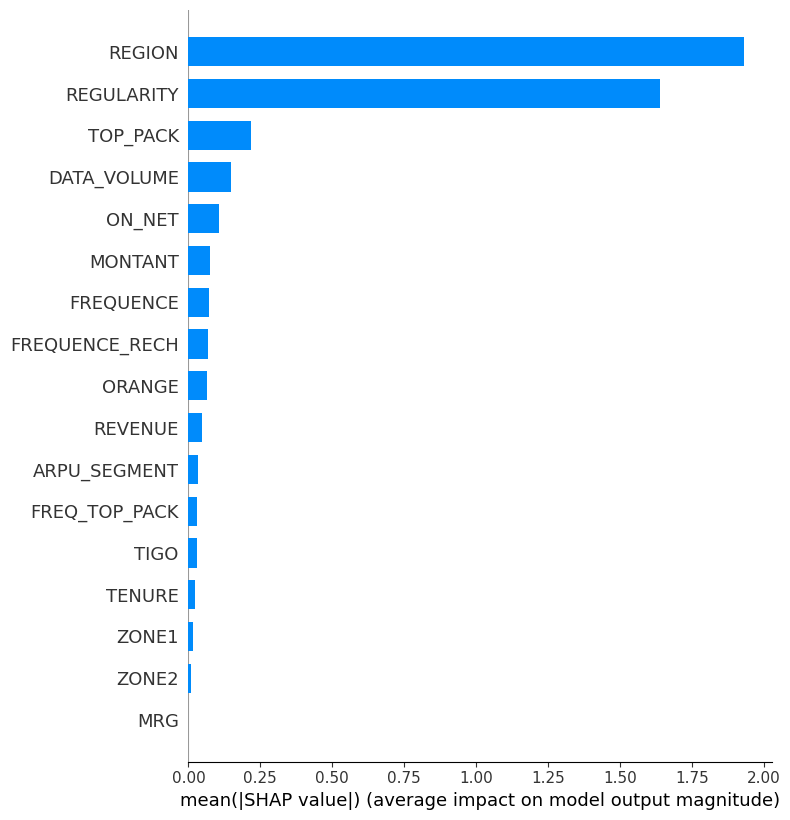

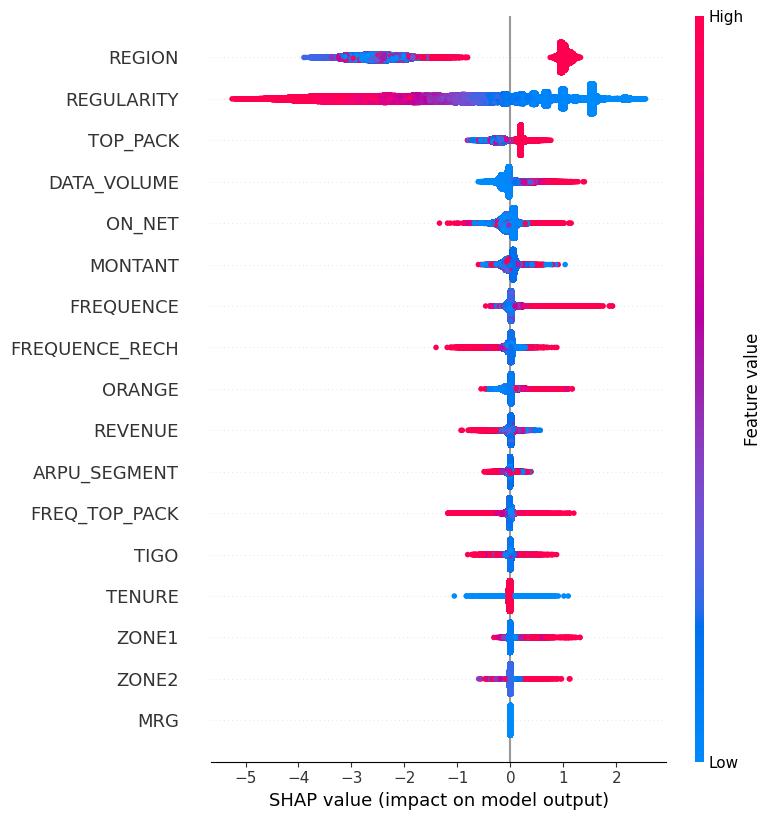

Top 10 features selon SHAP :
           feature  mean_abs_shap
0           REGION       1.932805
14      REGULARITY       1.640213
15        TOP_PACK       0.216050
7      DATA_VOLUME       0.147149
8           ON_NET       0.104641
2          MONTANT       0.075092
6        FREQUENCE       0.072762
3   FREQUENCE_RECH       0.068605
9           ORANGE       0.064637
4          REVENUE       0.045663


In [36]:
#pip install shap

import shap
import matplotlib.pyplot as plt

# Créer l'explainer pour XGBoost
explainer = shap.TreeExplainer(xgb_model)

# Calculer les valeurs SHAP pour le jeu de test
shap_values = explainer.shap_values(X_test)

# 🔹 Graphique résumé global
shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)

# 🔹 Graphique détail (points par instance)
shap.summary_plot(shap_values, X_test, show=True)

# 🔹 Extra : top 10 features les plus importantes
import pandas as pd
importance_df = pd.DataFrame({
    "feature": X_test.columns,
    "mean_abs_shap": np.abs(shap_values).mean(axis=0)
}).sort_values(by="mean_abs_shap", ascending=False)

print("Top 10 features selon SHAP :")
print(importance_df.head(10))


In [11]:
import sklearn

# On fait une copie de globals() pour éviter l'erreur
for name, obj in list(globals().items()):
    if "sklearn" in str(type(obj)):
        print(name, ":", type(obj))
